# Computation v.s. number of servers

computation time include `forward` and `backward`, because in between of `forward` and 
`backward` there is a loss synchronization takes a lot of time (we haven't broke down it into loss computation etc.)



In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


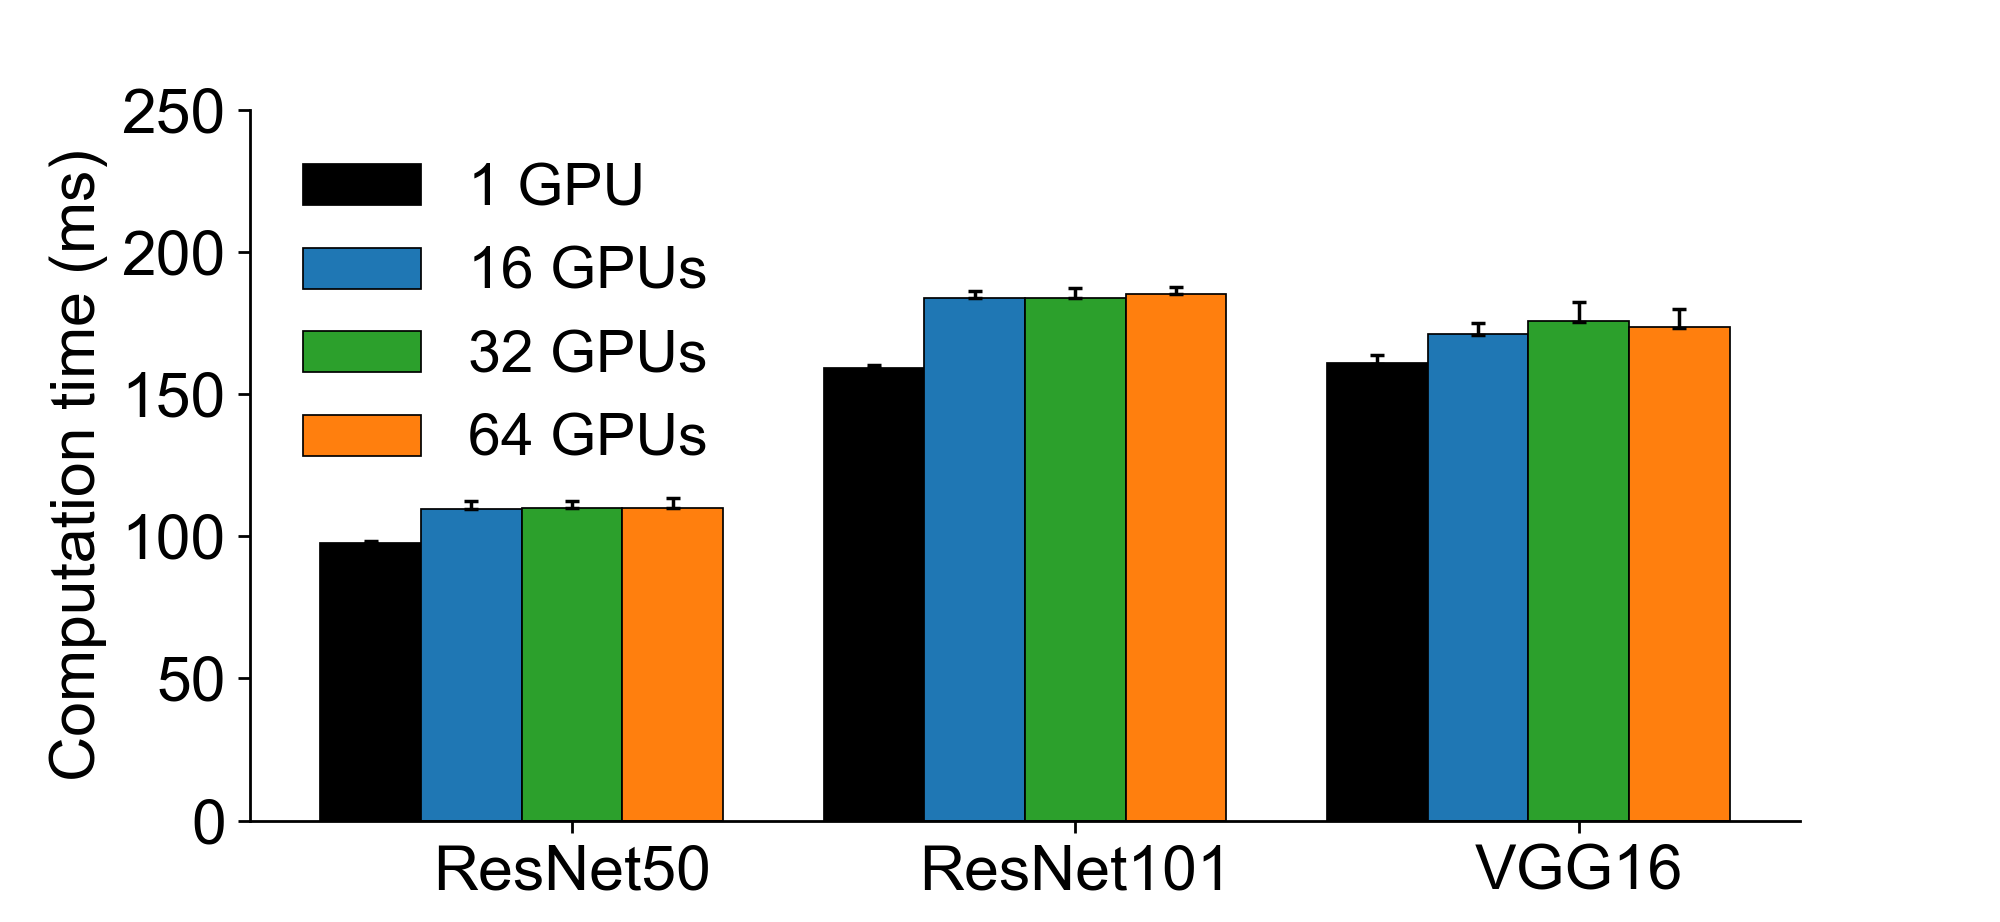

In [8]:

file_name = "../Eval_computation_vs_num_servers.pdf"

intervals = ['ResNet50', 'ResNet101', 'VGG16']

single_device = [97.57, 159.22, 160.983]
sd_yerr = np.array([
    [0.019, 0.674],
    [0.070, 1.209],
    [0.191, 2.778]
]).T

two_servers = [109.626, 184.042, 171.295]
two_servers_yerr = np.array([
    [0.009, 2.86],
    [0.030, 2.31],
    [0.461, 3.70]
]).T

four_servers = [109.99, 184.016, 175.77]
four_servers_yerr = np.array([
    [ 0.069, 2.62],
    [0.157, 3.239],
    [0.447, 6.712]
]).T

eight_servers = [110.14, 185.35, 173.540]
eight_servers_yerr = np.array([
    [0.066, 3.235],
    [0.0501, 2.55],
    [0.287, 6.52]
]).T

x = np.arange(len(intervals))
width = 0.8
n = 4

font_size = 18
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf',fonttype = 42)

fig, ax = plt.subplots(figsize=(8, 3.69))

rects1 = ax.bar(x - 2* width/n, single_device, width/n, label='1 GPU', 
                yerr=sd_yerr,
                error_kw={'capsize':2, 'elinewidth':1},linewidth=0.5,
                edgecolor='black', color='k')

rects1 = ax.bar(x - width/n, two_servers, width/n, label='16 GPUs', 
                yerr=two_servers_yerr,
                error_kw={'capsize':2, 'elinewidth':1},linewidth=0.5,
                edgecolor='black', color='tab:blue')

rects2 = ax.bar(x, four_servers, width/n, label='32 GPUs', 
                yerr=four_servers_yerr,
                error_kw={'capsize':2, 'elinewidth':1},linewidth=0.5,
                edgecolor='black', color='tab:green')

rects3 = ax.bar(x + width/n, eight_servers, width/n, label='64 GPUs', 
                yerr=eight_servers_yerr,
                error_kw={'capsize':2, 'elinewidth':1},linewidth=0.5,
                edgecolor='black', color='tab:orange')

ax.set_ylabel('Computation time (ms)')
# ax.set_title('End to End Latency: vs Simple Transmission (V100)')
ax.set_xticks(x)
ax.set_xticklabels(intervals)
ax.legend(
    frameon=False, ncol=1, loc='upper left', 
          prop={'size': font_size-1})

ax.set_ylim(0, 250)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.axhline(100, ls='--', c='k')
# fig.tight_layout()

# plt.show()
plt.savefig(file_name, format="pdf")

<IPython.core.display.Javascript object>


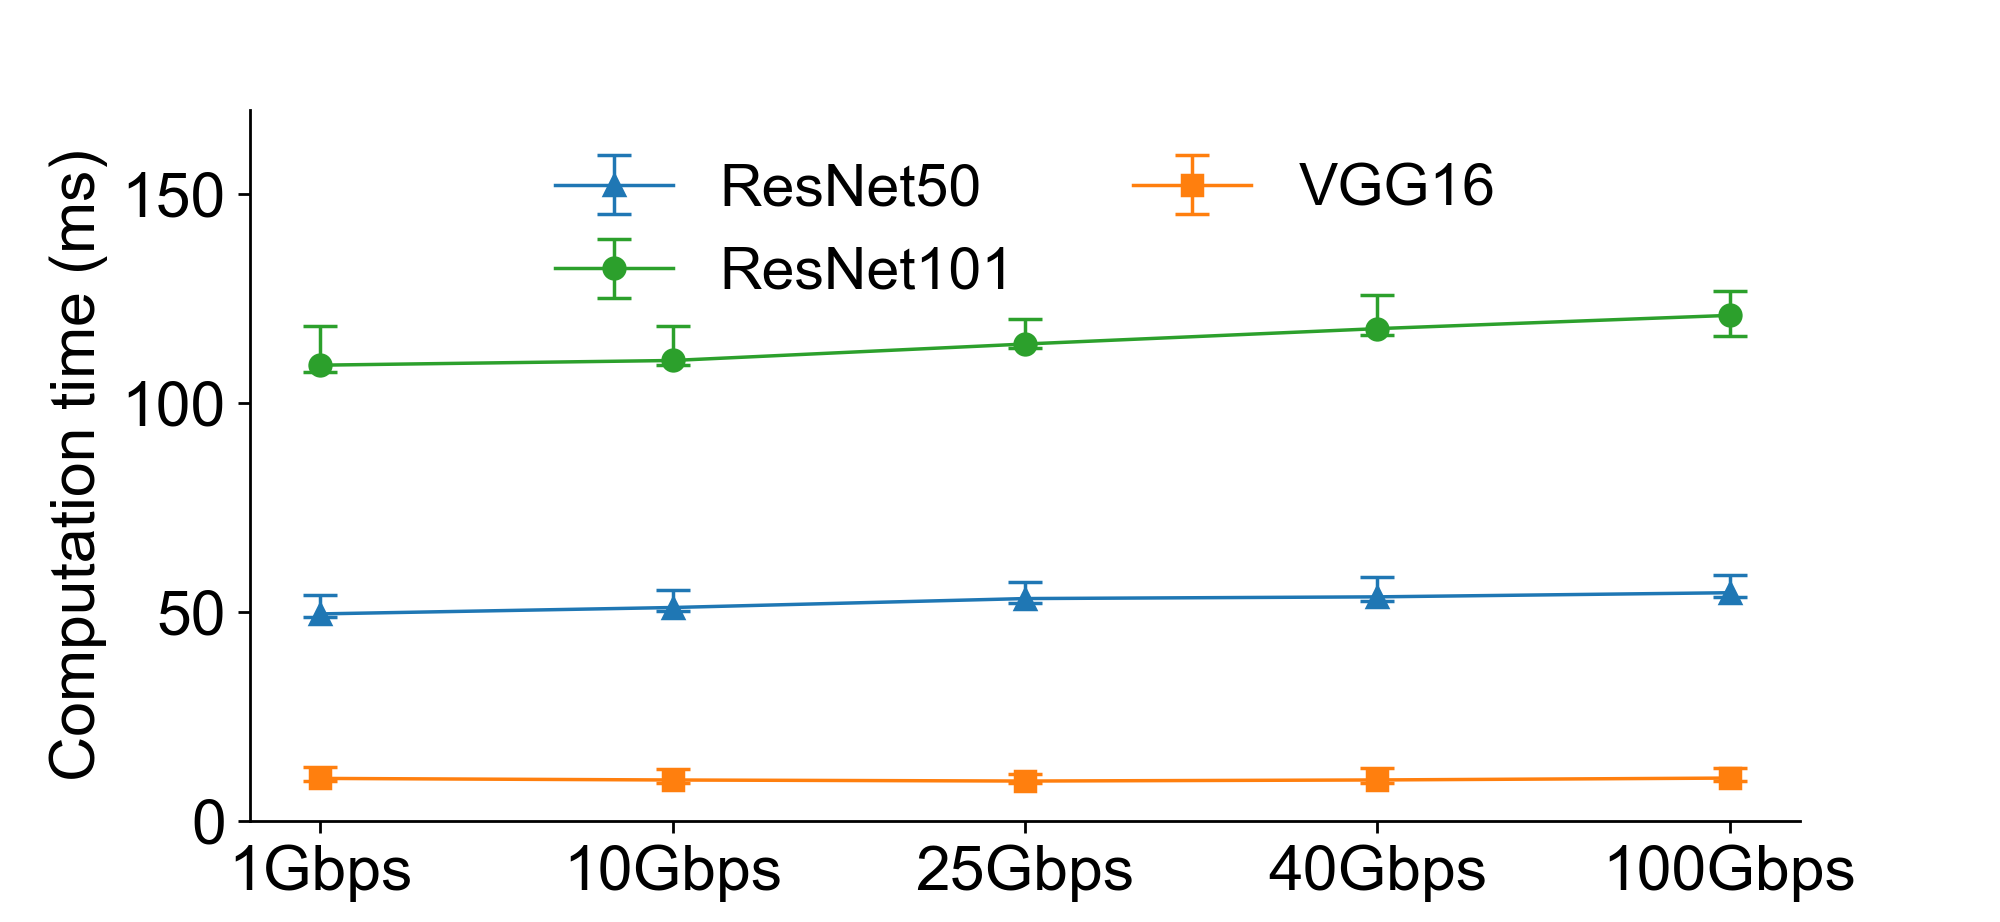

In [28]:
# fixed  with Two Nodes


file_name = "../Eval_computation_vs_bandwidth.pdf"

intervals = ['1Gbps', '10Gbps', '25Gbps', '40Gbps', '100Gbps']

resnet50 = [49.45, 50.98, 53.12, 53.53, 54.52]
resnet50_yerr = np.array([
    [0.78, 4.5],
    [0.86, 4.24],
    [1.07, 4.04],
    [1.039, 4.78],
    [1.102, 4.36]
]).T

resnet101 = [108.98, 110.10, 114.04, 117.72, 120.90]
resnet101_yerr = np.array([
    [1.70, 9.27],
    [1.035, 8.37],
    [1.036, 6.10],
    [1.56, 8.05],
    [5.04, 5.93]
]).T

vgg16 = [10.08, 9.70, 9.45, 9.71, 10.16]
vgg16_yerr = np.array([
    [0.53, 2.80],
    [0.66, 2.64],
    [0.54, 1.76],
    [0.73, 2.77],
    [0.68, 2.32]
]).T

x = np.arange(len(intervals))
width = 0.8
n = 4

font_size = 18
plt.rc('font',**{'size': font_size, 'family': 'Arial' })
plt.rc('pdf', fonttype = 42)

fig, ax = plt.subplots(figsize=(8, 3.69))

line1 = ax.errorbar(x , resnet50, label='ResNet50', marker='^',
                yerr=resnet50_yerr, capsize=5,
                linewidth=1,
                 color='tab:blue')

line2 = ax.errorbar(x, resnet101, label='ResNet101', marker='o',
                yerr=resnet101_yerr,capsize=5,
                linewidth=1,
                 color='tab:green')

line3 = ax.errorbar(x , vgg16, label='VGG16', marker='s',
                yerr=vgg16_yerr,capsize=5,
                linewidth=1,
                color='tab:orange')

ax.set_ylabel('Computation time (ms)')
# ax.set_title('End to End Latency: vs Simple Transmission (V100)')
ax.set_xticks(x)
ax.set_xticklabels(intervals)
ax.legend(
    frameon=False, ncol=2, loc='upper center', bbox_to_anchor=(0.5, 1),
          prop={'size': font_size-1})

ax.set_ylim(0, 170)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.axhline(100, ls='--', c='k')
# fig.tight_layout()

# plt.show()
plt.savefig(file_name, format="pdf")